In [1]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns

import rrcf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
# Read data
taxi = pd.read_csv('nyc_taxi.csv',
                   index_col=0)
taxi.index = pd.to_datetime(taxi.index)
data = taxi['value'].astype(float).values

# Create events
events = {
'independence_day' : ('2014-07-04 00:00:00',
                      '2014-07-07 00:00:00'),
'labor_day'        : ('2014-09-01 00:00:00',
                      '2014-09-02 00:00:00'),
'labor_day_parade' : ('2014-09-06 00:00:00',
                      '2014-09-07 00:00:00'),
'nyc_marathon'     : ('2014-11-02 00:00:00',
                      '2014-11-03 00:00:00'),
'thanksgiving'     : ('2014-11-27 00:00:00',
                      '2014-11-28 00:00:00'),
'christmas'        : ('2014-12-25 00:00:00',
                      '2014-12-26 00:00:00'),
'new_year'         : ('2015-01-01 00:00:00',
                      '2015-01-02 00:00:00'),
'blizzard'         : ('2015-01-26 00:00:00',
                      '2015-01-28 00:00:00')
}
taxi['event'] = np.zeros(len(taxi))
for event, duration in events.items():
    start, end = duration
    taxi.loc[start:end, 'event'] = 1

# 1, raw data investigation

In [65]:
taxi.head()

,value,event
timestamp,,
2014-07-01 00:00:00,10844,0.0
2014-07-01 00:30:00,8127,0.0
2014-07-01 01:00:00,6210,0.0
2014-07-01 01:30:00,4656,0.0
2014-07-01 02:00:00,3820,0.0


In [4]:
taxi.describe()

,value,event
count,10320.000000,10320.000000
mean,15137.569380,0.051938
std,6939.495808,0.221913
min,8.000000,0.000000
25%,10262.000000,0.000000
50%,16778.000000,0.000000
75%,19838.750000,0.000000
max,39197.000000,1.000000


In [5]:
taxi['value'].loc[taxi['event'] == 1].mean()

11439.505597014926

In [6]:
taxi['value'].loc[taxi['event'] != 1].mean()

15340.161590351594

In [7]:
taxi['value'].loc[taxi['event'] == 1].describe()

count      536.000000
mean     11439.505597
std       6458.713932
min          8.000000
25%       5935.000000
50%      11541.500000
75%      15476.500000
max      39197.000000
Name: value, dtype: float64

In [8]:
taxi['value'].loc[taxi['event'] != 1].describe()

count     9784.000000
mean     15340.161590
std       6908.217715
min       1279.000000
25%      10857.250000
50%      16973.500000
75%      19999.000000
max      29985.000000
Name: value, dtype: float64

In [9]:
taxi['value'].loc[taxi['event'] != 1].std()/taxi['value'].loc[taxi['event'] != 1].mean()

0.45033539410941925

In [10]:
taxi['value'].loc[taxi['event'] == 1].std()/taxi['value'].loc[taxi['event'] == 1].mean()

0.5645972963591125

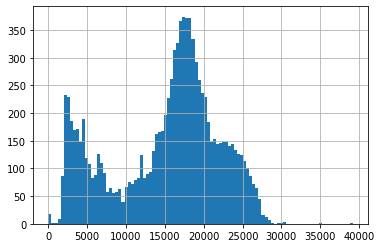

In [11]:
taxi['value'].hist(bins=100);

In [12]:
# the setting of deficit point is around 530

In [13]:
taxi['event'].sum()

536.0

In [14]:
len(taxi['event'])

10320

In [15]:
# the contamination ratio
taxi['event'].sum()/len(taxi['event'])

0.05193798449612403

# 2, Local outlier factor

In [16]:
lof_clf_n6 = LocalOutlierFactor(n_neighbors=6 )
lof_clf_n20 = LocalOutlierFactor(n_neighbors=20)
lof_clf_n6_ctm = LocalOutlierFactor(n_neighbors=6, contamination= .05)
lof_clf_n20_ctm = LocalOutlierFactor(n_neighbors=20, contamination= .05)

In [17]:
# lof_clf.fit_predict(taxi['value'])
# above syntax is wrong, as fit_predict has to deal with [[1],[2],[3]] type of value, not [1,2,3]

In [18]:
value = np.array(taxi['value']).reshape(-1, 1)

In [19]:
value

array([[10844],
       [ 8127],
       [ 6210],
       ...,
       [27309],
       [26591],
       [26288]])

In [20]:
lof_series_n6 = pd.Series(lof_clf_n6.fit_predict(value))
lof_series_n20 = pd.Series(lof_clf_n20.fit_predict(value))
lof_series_n6_c = pd.Series(lof_clf_n6_ctm.fit_predict(value))
lof_series_n20_c = pd.Series(lof_clf_n20_ctm.fit_predict(value))

In [21]:
taxi_1 = taxi.copy()

In [22]:
taxi_1 = taxi_1.reset_index()

In [23]:
taxi_1['lof_series_n6'] = list(lof_series_n6)
taxi_1['lof_series_n20'] = list(lof_series_n20)
taxi_1['lof_series_n6_c'] = list(lof_series_n6_c)
taxi_1['lof_series_n20_c'] = list(lof_series_n20_c)

In [24]:
taxi_1.tail(100)

,timestamp,value,event,lof_series_n6,lof_series_n20,lof_series_n6_c,lof_series_n20_c
10220,2015-01-29 22:00:00,22638,0.0,1,1,1,1
10221,2015-01-29 22:30:00,21501,0.0,1,1,1,1
10222,2015-01-29 23:00:00,20719,0.0,1,1,1,1
10223,2015-01-29 23:30:00,17877,0.0,1,1,1,1
10224,2015-01-30 00:00:00,14367,0.0,1,1,1,1
10225,2015-01-30 00:30:00,11118,0.0,1,1,1,1
10226,2015-01-30 01:00:00,8733,0.0,1,1,1,1
10227,2015-01-30 01:30:00,6954,0.0,1,1,1,1
10228,2015-01-30 02:00:00,5898,0.0,1,1,1,1
10229,2015-01-30 02:30:00,4541,0.0,1,1,1,1


In [25]:
taxi_1.columns

Index(['timestamp', 'value', 'event', 'lof_series_n6', 'lof_series_n20',
       'lof_series_n6_c', 'lof_series_n20_c'],
      dtype='object')

In [26]:
lof_series = ['lof_series_n6', 'lof_series_n20',
       'lof_series_n6_c', 'lof_series_n20_c']

In [27]:
for i in lof_series:
    print('*'*10, i, '*'*10)
    print(taxi_1[i].value_counts())
    


********** lof_series_n6 **********
 1    9966
-1     354
Name: lof_series_n6, dtype: int64
********** lof_series_n20 **********
 1    10301
-1       19
Name: lof_series_n20, dtype: int64
********** lof_series_n6_c **********
 1    9804
-1     516
Name: lof_series_n6_c, dtype: int64
********** lof_series_n20_c **********
 1    9804
-1     516
Name: lof_series_n20_c, dtype: int64


* when adding hyperparameter contamination, the total amount of outlier are same between n=6 and n=20

# 3, Isolation Forest

In [28]:
# in isolation forest, it needs to set up the contamation ratio
# or else, it will make 50% data as the outlier

In [29]:
isof_clf = IsolationForest(random_state=0, contamination=.05).fit(value)

In [30]:
isof_clf.predict(value)

array([ 1,  1,  1, ..., -1, -1, -1])

In [31]:
isof_clf.fit_predict(value)

array([ 1,  1,  1, ..., -1, -1, -1])

In [32]:
isof_series = pd.Series(isof_clf.fit_predict(value))

In [33]:
isof_series.describe()

count    10320.000000
mean         0.900194
std          0.435511
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
dtype: float64

In [34]:
isof_series.value_counts()

 1    9805
-1     515
dtype: int64

In [35]:
taxi_1['isof_series'] = isof_series

In [36]:
taxi_1.iloc[700:800]

,timestamp,value,event,lof_series_n6,lof_series_n20,lof_series_n6_c,lof_series_n20_c,isof_series
700,2014-07-15 14:00:00,22208,0.0,1,1,1,1,1
701,2014-07-15 14:30:00,21574,0.0,1,1,1,1,1
702,2014-07-15 15:00:00,17299,0.0,1,1,1,1,1
703,2014-07-15 15:30:00,15515,0.0,1,1,1,1,1
704,2014-07-15 16:00:00,13246,0.0,1,1,1,1,1
705,2014-07-15 16:30:00,12328,0.0,1,1,1,1,1
706,2014-07-15 17:00:00,15342,0.0,1,1,1,1,1
707,2014-07-15 17:30:00,18730,0.0,1,1,1,1,1
708,2014-07-15 18:00:00,23412,0.0,1,1,1,1,1
709,2014-07-15 18:30:00,26340,0.0,1,1,1,1,-1


# 4, two methods combine

### 4.1 aggressive method

* here, using 'lof_series_n20_c' (Local outlier factor in n=20 with contamination) and 'isof_series' (isolation forest with contamination) to combine those two methods

* the reason to choose lof_series_n20_c is because n=20 is recommend in documentation, saying that 20 is a balanced hyperparameter tuning and can suit for most of scenario

In [37]:
# agressive: any of -1 will be considered as an outlier
agg = []

for i in range(len(taxi_1)):
    if (taxi_1['lof_series_n20_c'][i] == -1) or (taxi_1['isof_series'][i] == -1):
        agg.append(-1)
    else:
        agg.append(1)

In [38]:
taxi_1['aggressive_outlier'] = agg

### 4.2 discreet method

In [39]:
# discreet: both of -1 will be considered as an outlier

dcr = []

for i in range(len(taxi_1)):
    if (taxi_1['lof_series_n20_c'][i] == -1) and (taxi_1['isof_series'][i] == -1):
        dcr.append(-1)
    else:
        dcr.append(1)

In [40]:
taxi_1['discreet_outlier'] = dcr

### 4.3 moderate method

In [41]:
# moderate: both of -1 will be considered as an outlier

mod = []

for i in range(len(taxi_1)):
    if (taxi_1['lof_series_n20_c'][i] == -1
      or taxi_1['lof_series_n6_c'][i] == -1) and (taxi_1['isof_series'][i] == -1):
        mod.append(-1)
    else:
        mod.append(1)
        
taxi_1['moderate_outlier'] = mod

In [42]:
taxi_1['aggressive_outlier'].value_counts()

 1    9362
-1     958
Name: aggressive_outlier, dtype: int64

In [43]:
taxi_1['discreet_outlier'].value_counts()

 1    10247
-1       73
Name: discreet_outlier, dtype: int64

In [44]:
taxi_1['moderate_outlier'].value_counts()

 1    10221
-1       99
Name: moderate_outlier, dtype: int64

### 4.4 calculate the outlier possibility

In [45]:
# outlier_pct: calculate the percentage of a data sample is an outlier

pct_outlier = []

for i in range(len(taxi_1)):
    if (taxi_1['moderate_outlier'][i] == -1):
        pct_outlier.append(0.8)
    elif (taxi_1['aggressive_outlier'][i] == -1) and (taxi_1['moderate_outlier'][i] == 1):
        pct_outlier.append(0.4)
    elif (taxi_1['lof_series_n6_c'][i] == -1) or (taxi_1['lof_series_n20'][i] == -1) or (taxi_1['lof_series_n6'][i] == -1):
        pct_outlier.append(0.2)    
    else:
        pct_outlier.append(0.05)
        
        
taxi_1['outlier_pct'] = pct_outlier

In [46]:
taxi_1.dtypes

timestamp             datetime64[ns]
value                          int64
event                        float64
lof_series_n6                  int64
lof_series_n20                 int64
lof_series_n6_c                int64
lof_series_n20_c               int64
isof_series                    int64
aggressive_outlier             int64
discreet_outlier               int64
moderate_outlier               int64
outlier_pct                  float64
dtype: object

In [47]:
taxi_1.iloc[-100:]

,timestamp,value,event,lof_series_n6,lof_series_n20,lof_series_n6_c,lof_series_n20_c,isof_series,aggressive_outlier,discreet_outlier,moderate_outlier,outlier_pct
10220,2015-01-29 22:00:00,22638,0.0,1,1,1,1,1,1,1,1,0.05
10221,2015-01-29 22:30:00,21501,0.0,1,1,1,1,1,1,1,1,0.05
10222,2015-01-29 23:00:00,20719,0.0,1,1,1,1,1,1,1,1,0.05
10223,2015-01-29 23:30:00,17877,0.0,1,1,1,1,1,1,1,1,0.05
10224,2015-01-30 00:00:00,14367,0.0,1,1,1,1,1,1,1,1,0.05
10225,2015-01-30 00:30:00,11118,0.0,1,1,1,1,1,1,1,1,0.05
10226,2015-01-30 01:00:00,8733,0.0,1,1,1,1,1,1,1,1,0.05
10227,2015-01-30 01:30:00,6954,0.0,1,1,1,1,1,1,1,1,0.05
10228,2015-01-30 02:00:00,5898,0.0,1,1,1,1,1,1,1,1,0.05
10229,2015-01-30 02:30:00,4541,0.0,1,1,1,1,1,1,1,1,0.05


In [48]:
taxi_1['outlier_pct'].sum()

956.4500000000002

In [49]:
len(taxi_1)


10320

In [50]:
len(taxi_1)*.07

722.4000000000001

# 5, verify with event

In [53]:
 df_w_evn = taxi_1.loc[taxi_1['event']==1]
 df_wo_evn = taxi_1.loc[taxi_1['event']!=1]

In [55]:
df_w_evn.describe()

,value,event,lof_series_n6,lof_series_n20,lof_series_n6_c,lof_series_n20_c,isof_series,aggressive_outlier,discreet_outlier,moderate_outlier,outlier_pct
count,536.000000,536.0,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,11439.505597,1.0,0.884328,0.970149,0.861940,0.910448,0.858209,0.809701,0.958955,0.925373,0.103545
std,6458.713932,0.0,0.467302,0.242735,0.507483,0.414010,0.513780,0.587390,0.283822,0.379412,0.161409
min,8.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.050000
25%,5935.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
50%,11541.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
75%,15476.500000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
max,39197.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000


In [56]:
df_wo_evn.describe()

,value,event,lof_series_n6,lof_series_n20,lof_series_n6_c,lof_series_n20_c,isof_series,aggressive_outlier,discreet_outlier,moderate_outlier,outlier_pct
count,9784.000000,9784.0,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,15340.161590,0.0,0.933974,0.997751,0.902085,0.899428,0.902494,0.814595,0.987326,0.983851,0.092084
std,6908.217715,0.0,0.357360,0.067026,0.431580,0.437092,0.430725,0.580059,0.158712,0.178998,0.118745
min,1279.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.050000
25%,10857.250000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
50%,16973.500000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
75%,19999.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
max,29985.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000


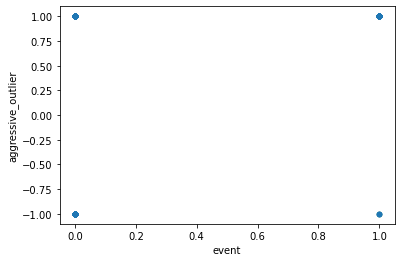

In [59]:
taxi_1.plot(kind='scatter',x='event', y='aggressive_outlier', alpha=.1);

In [64]:
confusion_matrix = pd.crosstab(taxi_1['event'], taxi_1['aggressive_outlier'],)
confusion_matrix

aggressive_outlier,-1,1
event,,
0.0,907,8877
1.0,51,485


In [62]:
pd.crosstab(taxi_1['event'], taxi_1['isof_series'])

isof_series,-1,1
event,,
0.0,477,9307
1.0,38,498


In [63]:
pd.crosstab(taxi_1['event'], taxi_1['lof_series_n20_c'])

lof_series_n20_c,-1,1
event,,
0.0,492,9292
1.0,24,512
